In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
import pickle
import joblib


In [4]:
df = pd.read_csv("gastric_cancer_detection_dataset.csv")
df.head()

,age,gender,ethnicity,geographical_location,family_history,smoking_habits,alcohol_consumption,helicobacter_pylori_infection,dietary_habits,existing_conditions,...,elmmo,microcosm,miranda,mirdb,pictar,pita,targetscan,predicted.sum,all.sum,label
0,43,Male,Ethnicity_A,Other,1,0,0,0,Low_Salt,Chronic Gastritis,...,0.187003,0.786422,0.204816,0.561920,0.438175,0.283603,0.928244,4.324299,7.666791,0
1,86,Female,Ethnicity_B,California,1,0,0,1,High_Salt,Diabetes,...,0.493322,0.963989,0.498041,0.985585,0.144609,0.375375,0.103573,7.967674,1.483280,0
2,68,Male,Ethnicity_A,California,0,1,1,0,High_Salt,NaN,...,0.573560,0.666896,0.540388,0.905853,0.827279,0.350915,0.166878,3.748651,3.046783,0
3,57,Female,Ethnicity_A,Other,0,0,0,1,High_Salt,Chronic Gastritis,...,0.261399,0.949488,0.134170,0.429935,0.935231,0.794704,0.867036,5.478298,8.811307,0
4,33,Male,Ethnicity_A,California,0,1,1,0,High_Salt,Diabetes,...,0.754478,0.263164,0.876767,0.650832,0.337669,0.427492,0.915804,1.809181,0.394632,0


In [5]:
df

,age,gender,ethnicity,geographical_location,family_history,smoking_habits,alcohol_consumption,helicobacter_pylori_infection,dietary_habits,existing_conditions,...,elmmo,microcosm,miranda,mirdb,pictar,pita,targetscan,predicted.sum,all.sum,label
0,43,Male,Ethnicity_A,Other,1,0,0,0,Low_Salt,Chronic Gastritis,...,0.187003,0.786422,0.204816,0.561920,0.438175,0.283603,0.928244,4.324299,7.666791,0
1,86,Female,Ethnicity_B,California,1,0,0,1,High_Salt,Diabetes,...,0.493322,0.963989,0.498041,0.985585,0.144609,0.375375,0.103573,7.967674,1.483280,0
2,68,Male,Ethnicity_A,California,0,1,1,0,High_Salt,NaN,...,0.573560,0.666896,0.540388,0.905853,0.827279,0.350915,0.166878,3.748651,3.046783,0
3,57,Female,Ethnicity_A,Other,0,0,0,1,High_Salt,Chronic Gastritis,...,0.261399,0.949488,0.134170,0.429935,0.935231,0.794704,0.867036,5.478298,8.811307,0
4,33,Male,Ethnicity_A,California,0,1,1,0,High_Salt,Diabetes,...,0.754478,0.263164,0.876767,0.650832,0.337669,0.427492,0.915804,1.809181,0.394632,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212349,47,Male,Ethnicity_A,California,0,1,1,0,High_Salt,Chronic Gastritis,...,0.408123,0.925035,0.267628,0.538474,0.463471,0.827892,0.929147,0.866260,6.698303,0
212350,59,Female,Ethnicity_A,California,0,1,1,0,High_Salt,Chronic Gastritis,...,0.578204,0.768279,0.339168,0.236523,0.444216,0.011762,0.053098,5.102216,2.338017,0
212351,58,Female,Ethnicity_C,California,0,0,0,0,High_Salt,NaN,...,0.940936,0.865221,0.448189,0.899351,0.766615,0.098454,0.384019,7.774612,4.601637,1
212352,77,Female,Ethnicity_B,California,1,1,0,1,High_Salt,Chronic Gastritis,...,0.498088,0.048195,0.924610,0.101521,0.464988,0.639401,0.410327,2.362698,2.020047,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212354 entries, 0 to 212353
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   age                            212354 non-null  int64  
 1   gender                         212354 non-null  object 
 2   ethnicity                      212354 non-null  object 
 3   geographical_location          212354 non-null  object 
 4   family_history                 212354 non-null  int64  
 5   smoking_habits                 212354 non-null  int64  
 6   alcohol_consumption            212354 non-null  int64  
 7   helicobacter_pylori_infection  212354 non-null  int64  
 8   dietary_habits                 212354 non-null  object 
 9   existing_conditions            169868 non-null  object 
 10  endoscopic_images              212354 non-null  object 
 11  biopsy_results                 212354 non-null  object 
 12  ct_scan                       

In [7]:
df.describe()

,age,family_history,smoking_habits,alcohol_consumption,helicobacter_pylori_infection,target_entrez,target_ensembl,diana_microt,elmmo,microcosm,miranda,mirdb,pictar,pita,targetscan,predicted.sum,all.sum,label
count,212354.000000,212354.000000,212354.000000,212354.000000,212354.000000,212354.000000,2.123540e+05,212354.000000,2.123540e+05,212354.000000,212354.000000,212354.000000,2.123540e+05,212354.000000,212354.000000,212354.000000,212354.000000,212354.000000
mean,53.258036,0.300564,0.399154,0.499378,0.249470,5496.117332,1.499874e+06,0.500527,4.994971e-01,0.500083,0.499895,0.500125,4.989745e-01,0.501152,0.501117,5.010346,5.000085,0.098698
std,18.984419,0.458504,0.489726,0.500001,0.432707,2596.817632,2.882585e+05,0.288757,2.888452e-01,0.288491,0.288571,0.288738,2.884995e-01,0.288874,0.288678,2.884461,2.882685,0.298257
min,20.000000,0.000000,0.000000,0.000000,0.000000,1000.000000,1.000007e+06,0.000005,6.089062e-07,0.000003,0.000001,0.000013,7.743957e-07,0.000008,0.000004,0.000016,0.000081,0.000000
25%,37.000000,0.000000,0.000000,0.000000,0.000000,3252.000000,1.251177e+06,0.250034,2.486468e-01,0.249877,0.250206,0.250293,2.497943e-01,0.250322,0.251790,2.512241,2.505941,0.000000
50%,50.000000,0.000000,0.000000,0.000000,0.000000,5491.000000,1.500324e+06,0.501302,4.998040e-01,0.500498,0.499635,0.499888,4.985230e-01,0.502228,0.501814,5.018196,5.003598,0.000000
75%,69.000000,1.000000,1.000000,1.000000,0.000000,7738.000000,1.748424e+06,0.750783,7.495843e-01,0.748769,0.749075,0.749994,7.487212e-01,0.751212,0.751860,7.508878,7.493106,0.000000
max,89.000000,1.000000,1.000000,1.000000,1.000000,9999.000000,1.999998e+06,0.999998,9.999993e-01,0.999997,0.999997,1.000000,9.999986e-01,0.999993,0.999997,9.999908,9.999987,1.000000


In [8]:
df.columns

Index(['age', 'gender', 'ethnicity', 'geographical_location', 'family_history',
       'smoking_habits', 'alcohol_consumption',
       'helicobacter_pylori_infection', 'dietary_habits',
       'existing_conditions', 'endoscopic_images', 'biopsy_results', 'ct_scan',
       'mature_mirna_acc', 'mature_mirna_id', 'target_symbol', 'target_entrez',
       'target_ensembl', 'diana_microt', 'elmmo', 'microcosm', 'miranda',
       'mirdb', 'pictar', 'pita', 'targetscan', 'predicted.sum', 'all.sum',
       'label'],
      dtype='object')

In [9]:
df.isnull().sum()

age                                  0
gender                               0
ethnicity                            0
geographical_location                0
family_history                       0
smoking_habits                       0
alcohol_consumption                  0
helicobacter_pylori_infection        0
dietary_habits                       0
existing_conditions              42486
endoscopic_images                    0
biopsy_results                       0
ct_scan                              0
mature_mirna_acc                     0
mature_mirna_id                      0
target_symbol                        0
target_entrez                        0
target_ensembl                       0
diana_microt                         0
elmmo                                0
microcosm                            0
miranda                              0
mirdb                                0
pictar                               0
pita                                 0
targetscan               

In [10]:
def detect_outliers(df):
    numeric = df.select_dtypes(include='number')
    ## compute our q1, q3 and iqr
    Q1 = numeric.quantile(0.25)
    Q3 = numeric.quantile(0.75)
    IQR = Q3 - Q1
    ## define our lower and upper bound
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_ret = (numeric < lower_bound) | (numeric > upper_bound)
    return outlier_ret

In [11]:
outliers = detect_outliers(df)
outliers.sum()

age                                  0
family_history                       0
smoking_habits                       0
alcohol_consumption                  0
helicobacter_pylori_infection    52976
target_entrez                        0
target_ensembl                       0
diana_microt                         0
elmmo                                0
microcosm                            0
miranda                              0
mirdb                                0
pictar                               0
pita                                 0
targetscan                           0
predicted.sum                        0
all.sum                              0
label                            20959
dtype: int64

In [12]:
rows_with_outliers = outliers.any(axis=1)

In [13]:
df['helicobacter_pylori_infection'] = df['helicobacter_pylori_infection'].fillna('Unknown')

label
0    191395
1     20959
Name: count, dtype: int64


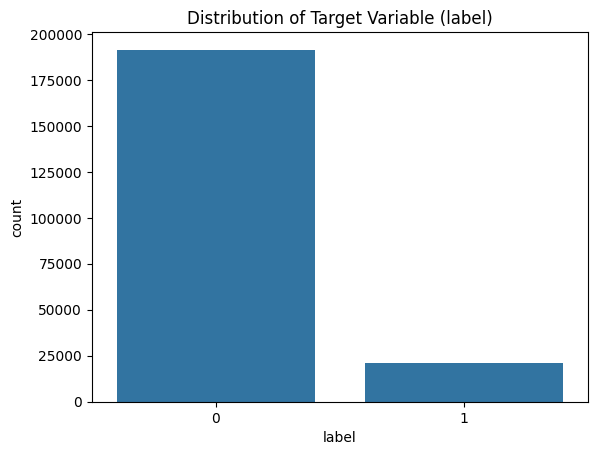

In [14]:

print(df['label'].value_counts())

sns.countplot(data=df, x='label')
plt.title('Distribution of Target Variable (label)')
plt.show()

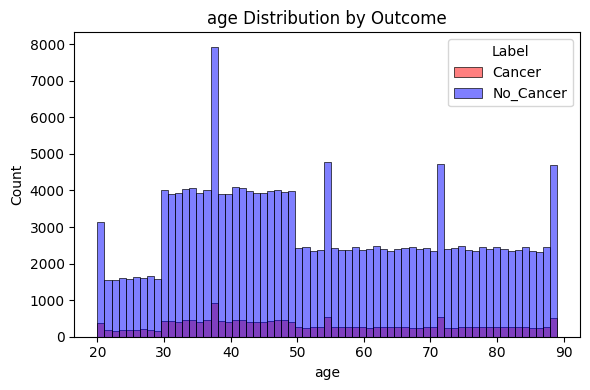

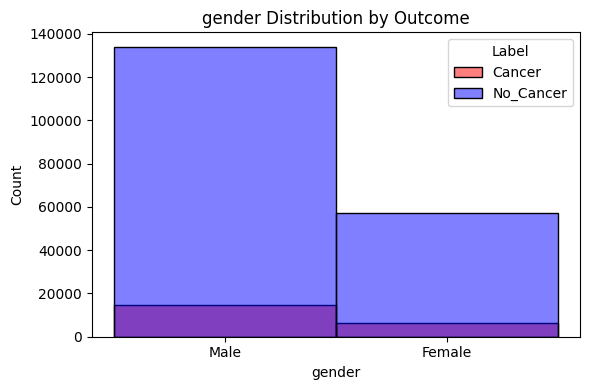

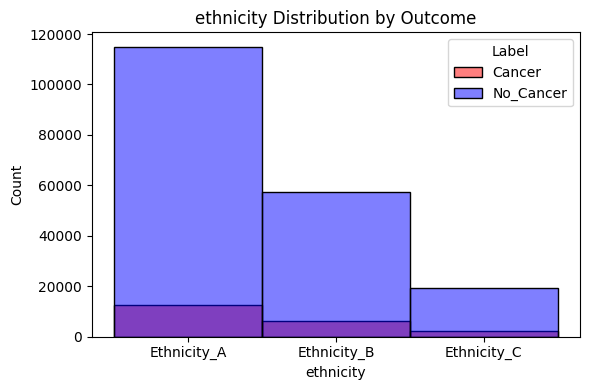

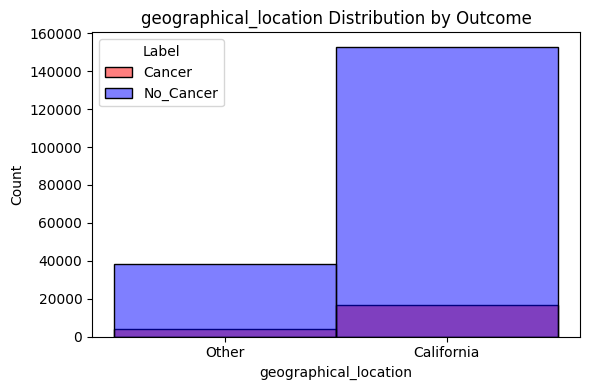

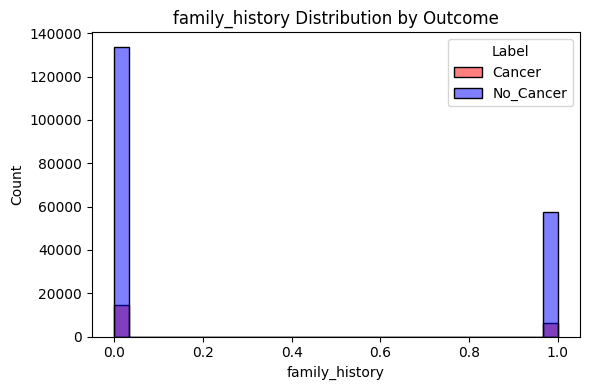

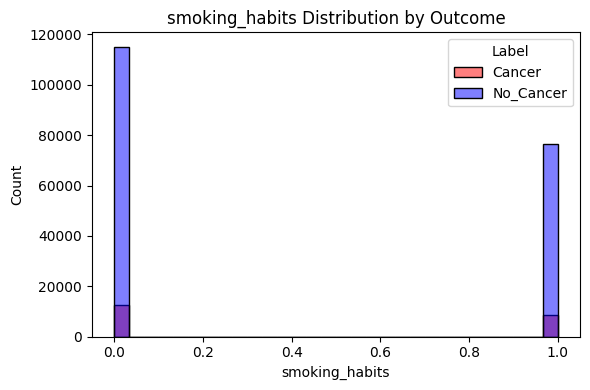

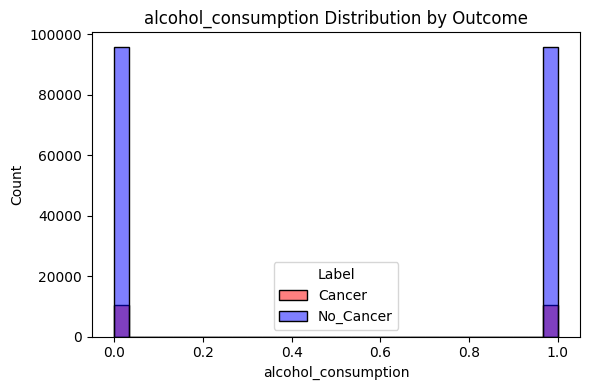

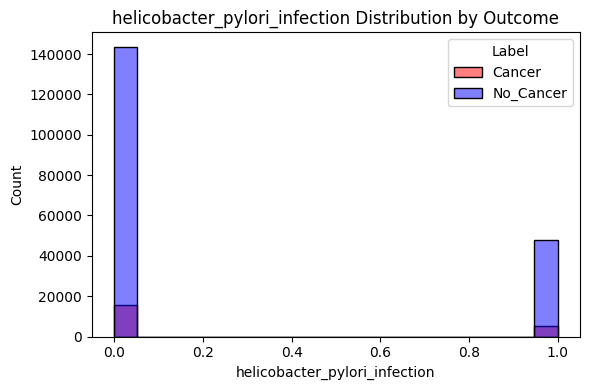

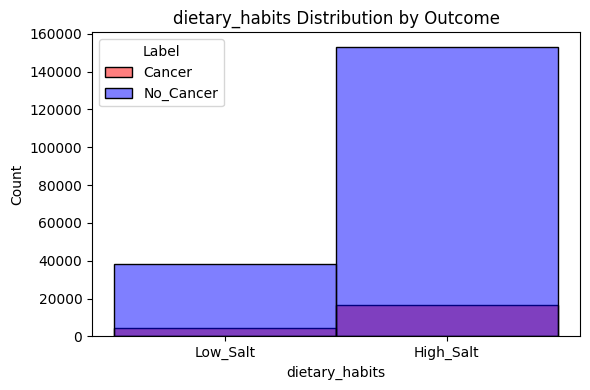

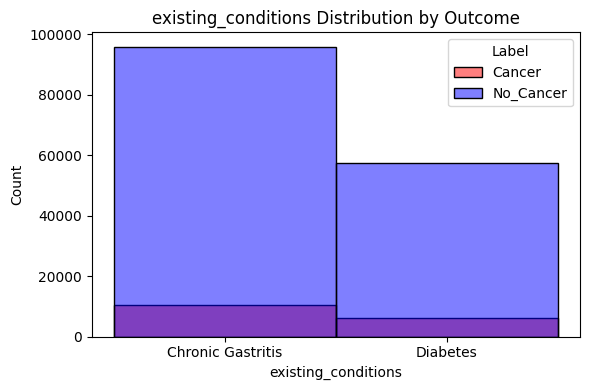

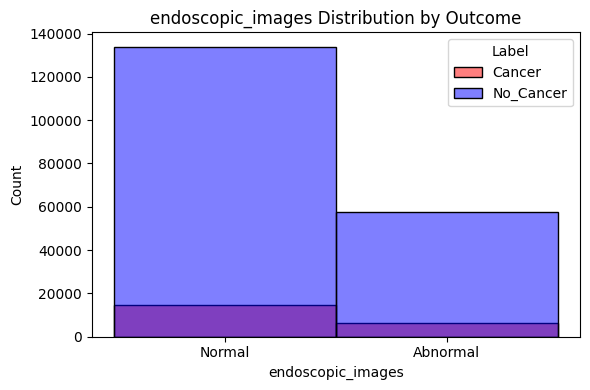

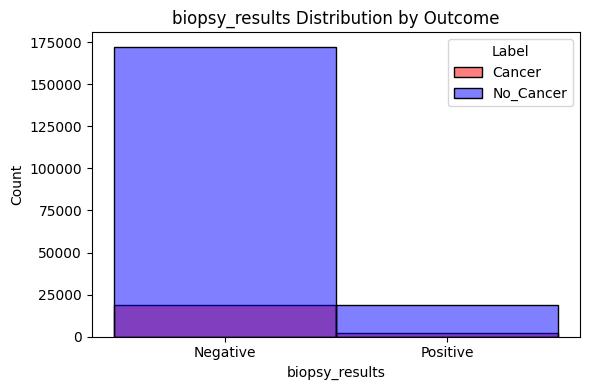

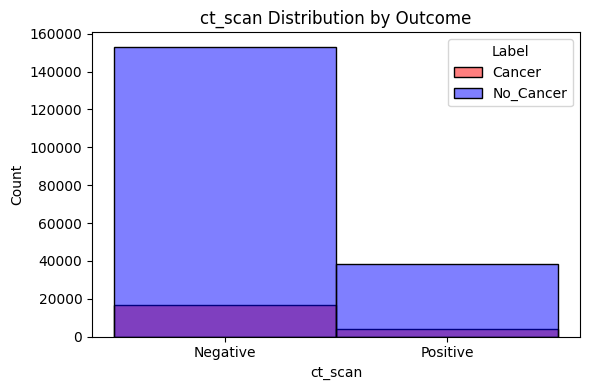

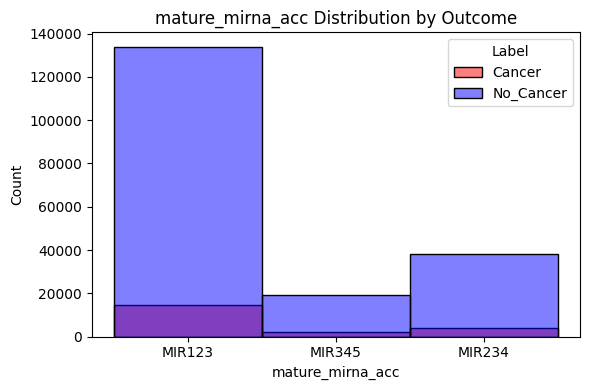

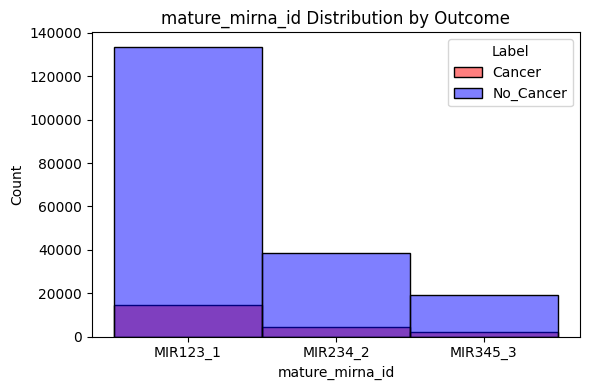

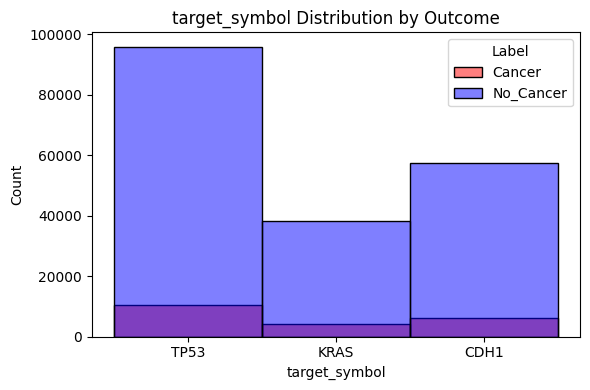

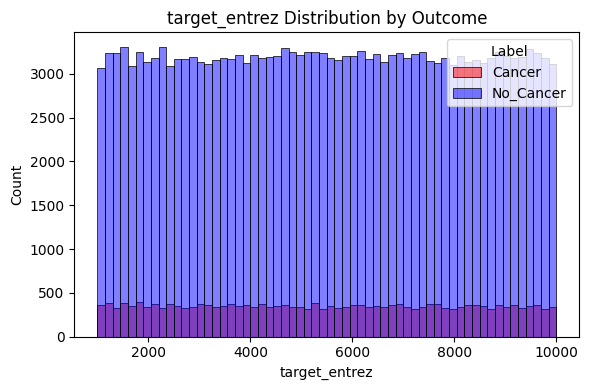

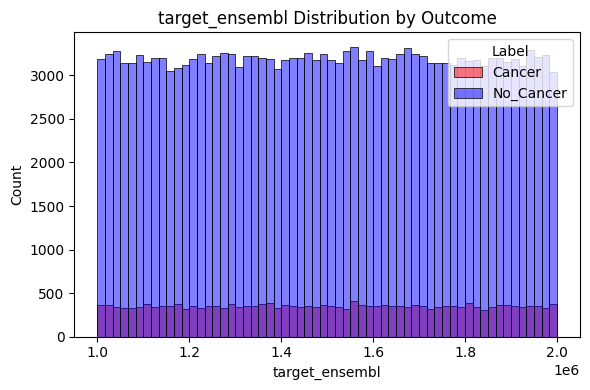

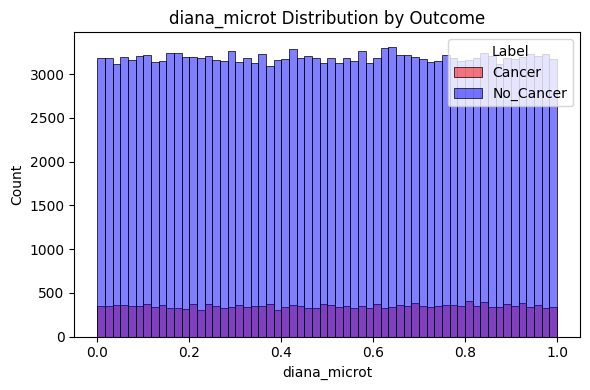

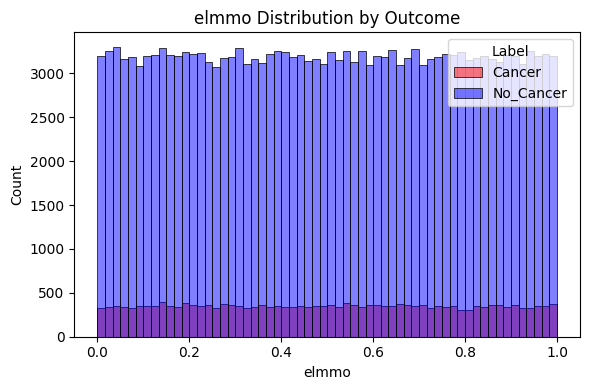

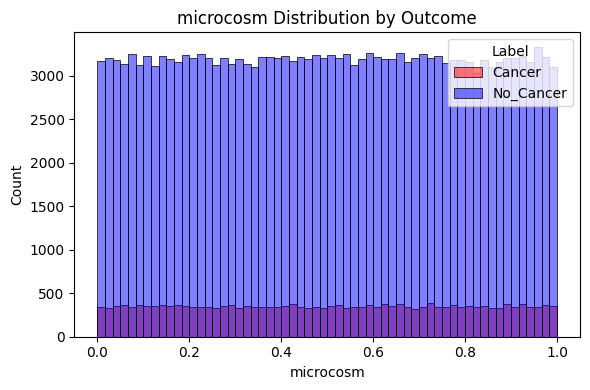

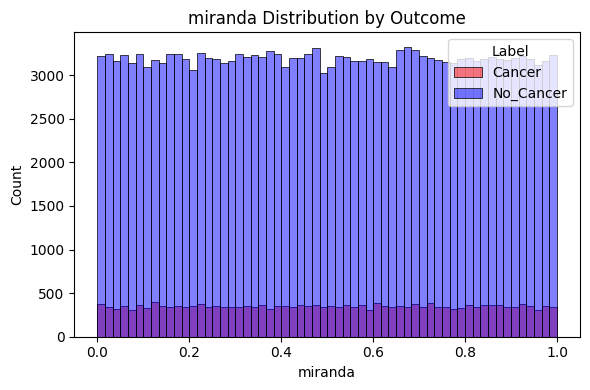

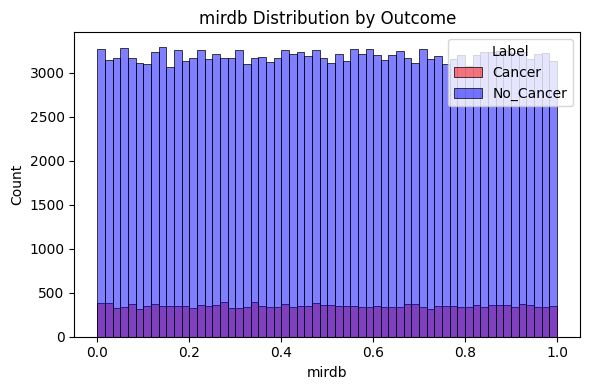

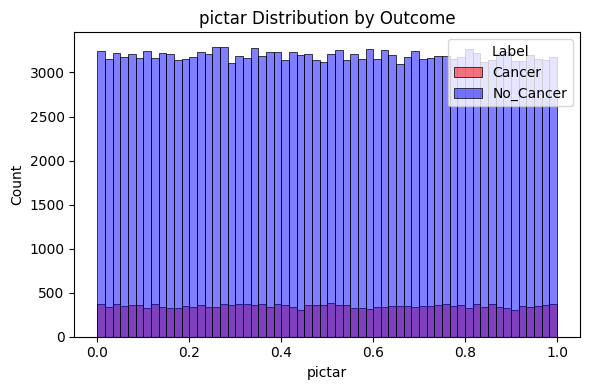

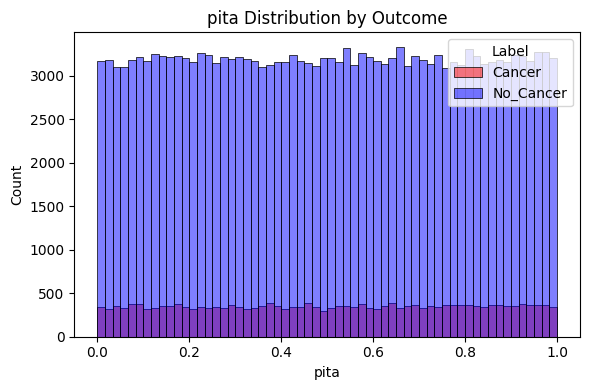

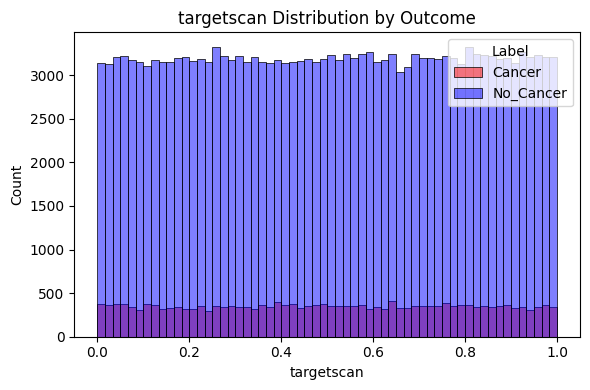

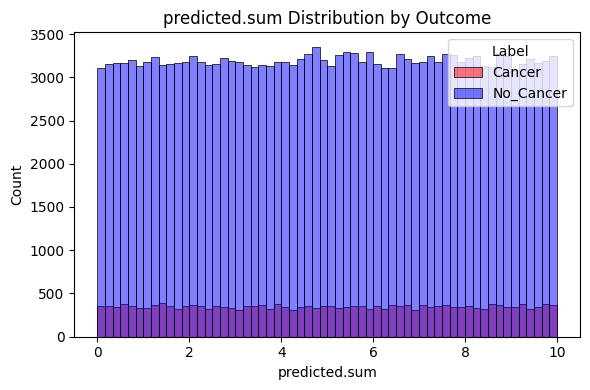

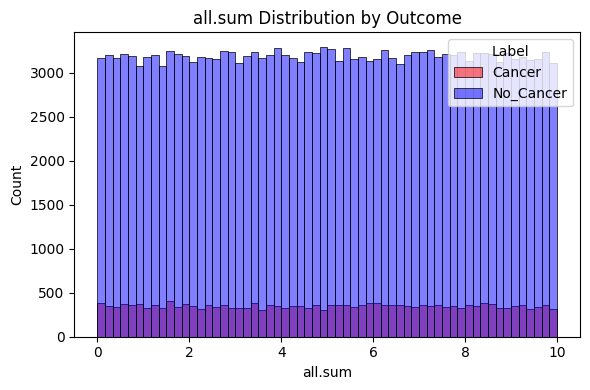

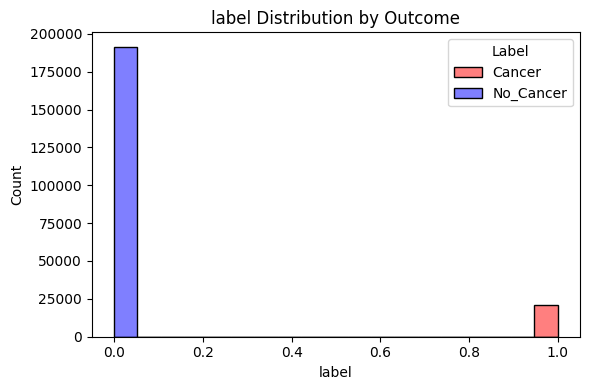

In [15]:
custom_palette = {
0: 'blue',
1: 'red'
}
for col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, hue='label',palette=custom_palette, kde=False, stat='count', element='bars')
    plt.title(f'{col} Distribution by Outcome')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Label', labels=['Cancer', 'No_Cancer'])
    plt.tight_layout()
    plt.show()

                               age  family_history  smoking_habits  \
age                            1.0            -0.0             0.0   
family_history                -0.0             1.0            -0.0   
smoking_habits                 0.0            -0.0             1.0   
alcohol_consumption            0.0            -0.0            -0.0   
helicobacter_pylori_infection  0.0            -0.0            -0.0   
target_entrez                 -0.0             0.0            -0.0   
target_ensembl                 0.0             0.0             0.0   
diana_microt                   0.0            -0.0            -0.0   
elmmo                         -0.0            -0.0            -0.0   
microcosm                      0.0            -0.0            -0.0   
miranda                        0.0             0.0             0.0   
mirdb                         -0.0             0.0            -0.0   
pictar                         0.0            -0.0             0.0   
pita                

<Axes: >

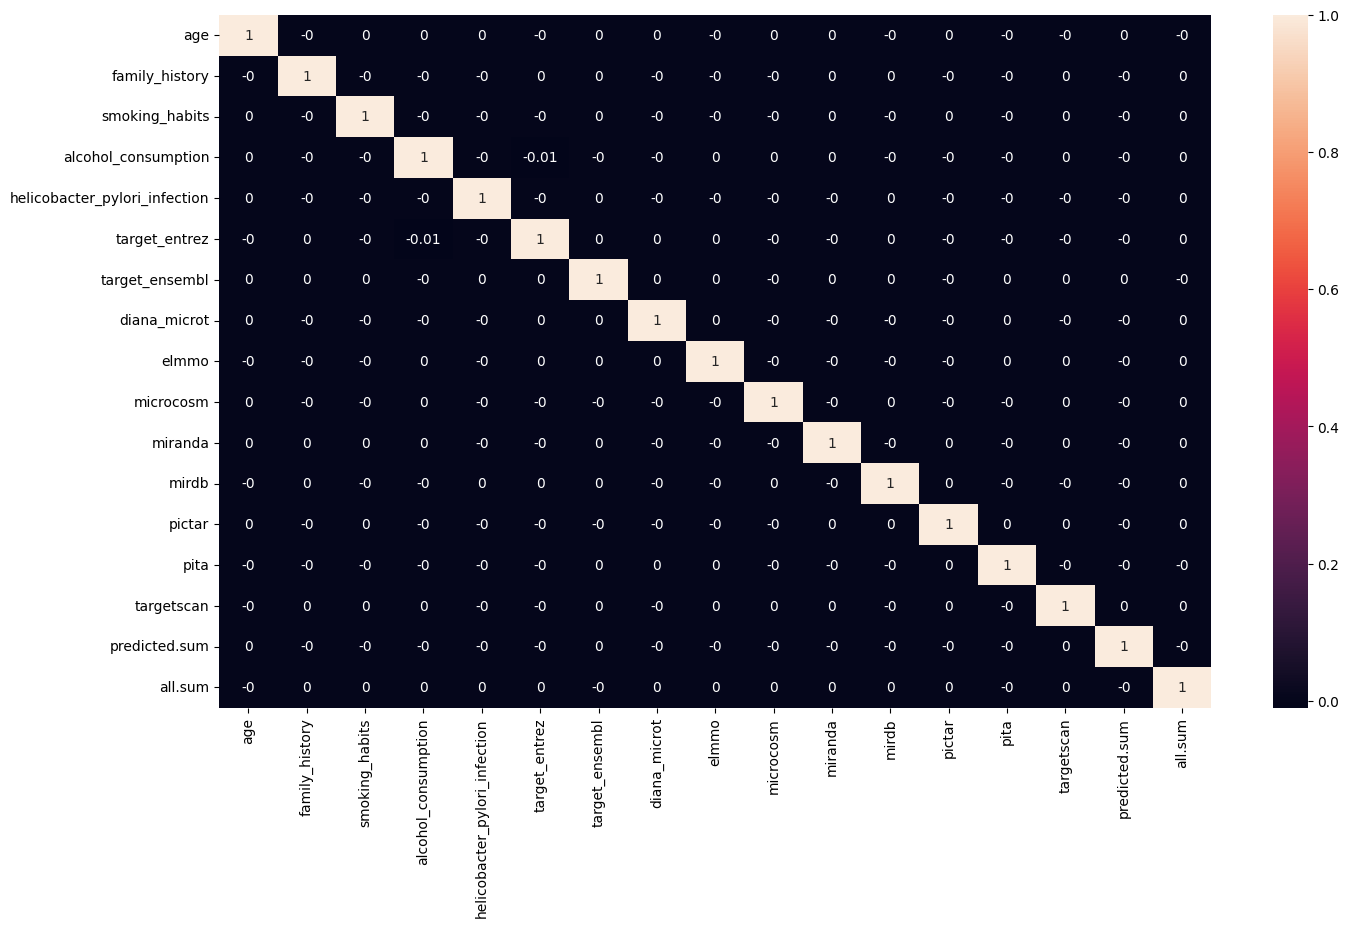

In [16]:
number_cols = df.select_dtypes(include='number').columns.drop('label')
corr_metrix = df[number_cols].corr().round(2)
print(corr_metrix)
fig, ax=plt.subplots(figsize=(16,9))
sns.heatmap(corr_metrix, annot=True, square=False, color='red')

In [17]:
df

,age,gender,ethnicity,geographical_location,family_history,smoking_habits,alcohol_consumption,helicobacter_pylori_infection,dietary_habits,existing_conditions,...,elmmo,microcosm,miranda,mirdb,pictar,pita,targetscan,predicted.sum,all.sum,label
0,43,Male,Ethnicity_A,Other,1,0,0,0,Low_Salt,Chronic Gastritis,...,0.187003,0.786422,0.204816,0.561920,0.438175,0.283603,0.928244,4.324299,7.666791,0
1,86,Female,Ethnicity_B,California,1,0,0,1,High_Salt,Diabetes,...,0.493322,0.963989,0.498041,0.985585,0.144609,0.375375,0.103573,7.967674,1.483280,0
2,68,Male,Ethnicity_A,California,0,1,1,0,High_Salt,NaN,...,0.573560,0.666896,0.540388,0.905853,0.827279,0.350915,0.166878,3.748651,3.046783,0
3,57,Female,Ethnicity_A,Other,0,0,0,1,High_Salt,Chronic Gastritis,...,0.261399,0.949488,0.134170,0.429935,0.935231,0.794704,0.867036,5.478298,8.811307,0
4,33,Male,Ethnicity_A,California,0,1,1,0,High_Salt,Diabetes,...,0.754478,0.263164,0.876767,0.650832,0.337669,0.427492,0.915804,1.809181,0.394632,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212349,47,Male,Ethnicity_A,California,0,1,1,0,High_Salt,Chronic Gastritis,...,0.408123,0.925035,0.267628,0.538474,0.463471,0.827892,0.929147,0.866260,6.698303,0
212350,59,Female,Ethnicity_A,California,0,1,1,0,High_Salt,Chronic Gastritis,...,0.578204,0.768279,0.339168,0.236523,0.444216,0.011762,0.053098,5.102216,2.338017,0
212351,58,Female,Ethnicity_C,California,0,0,0,0,High_Salt,NaN,...,0.940936,0.865221,0.448189,0.899351,0.766615,0.098454,0.384019,7.774612,4.601637,1
212352,77,Female,Ethnicity_B,California,1,1,0,1,High_Salt,Chronic Gastritis,...,0.498088,0.048195,0.924610,0.101521,0.464988,0.639401,0.410327,2.362698,2.020047,0


In [18]:
df.columns

Index(['age', 'gender', 'ethnicity', 'geographical_location', 'family_history',
       'smoking_habits', 'alcohol_consumption',
       'helicobacter_pylori_infection', 'dietary_habits',
       'existing_conditions', 'endoscopic_images', 'biopsy_results', 'ct_scan',
       'mature_mirna_acc', 'mature_mirna_id', 'target_symbol', 'target_entrez',
       'target_ensembl', 'diana_microt', 'elmmo', 'microcosm', 'miranda',
       'mirdb', 'pictar', 'pita', 'targetscan', 'predicted.sum', 'all.sum',
       'label'],
      dtype='object')

In [19]:
cat_cols = ['gender', 'ethnicity', 'geographical_location', 'dietary_habits', 'existing_conditions']
num_cols = ['age', 'family_history', 'smoking_habits', 'alcohol_consumption',
            'helicobacter_pylori_infection']

# 2. Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ]
)

In [20]:
X = df.drop(columns=['label'])
y = df['label']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [22]:
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

print("Preprocessor has been saved successfully!")

Preprocessor has been saved successfully!


In [23]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_processed, y_train)

print("\
After SMOTE training distribution:")
print(pd.Series(y_train_res).value_counts())

After SMOTE training distribution:
label
0    153116
1    153116
Name: count, dtype: int64


In [24]:
logr = linear_model.LogisticRegression(max_iter=1000)
logr.fit(X_train_processed, y_train)

y_pred_logr = logr.predict(X_test_processed)
print(y_pred_logr)
accuracy_log_reg = accuracy_score(y_test, y_pred_logr)
print(f"Logistic Regression Accuracy: {accuracy_log_reg}")


[0 0 0 ... 0 0 0]
Logistic Regression Accuracy: 0.9012973558428103


In [25]:
with open('logr_model.pkl', 'wb') as f:
    pickle.dump(logr, f)
print("✅ Model saved with pickle as 'logr_model.pkl'")

✅ Model saved with pickle as 'logr_model.pkl'


In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_processed, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test_processed)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")

KNN Accuracy: 0.8939747121565303


In [27]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_processed, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test_processed)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt}")

Decision Tree Accuracy: 0.8842975206611571


In [28]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_processed, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test_processed)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.8851451578724306


In [29]:
nb = GaussianNB()
nb.fit(X_train_processed, y_train)

y_pred_nb = nb.predict(X_test_processed)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy:{accuracy_nb}")

Naive Bayes Accuracy:0.9012973558428103


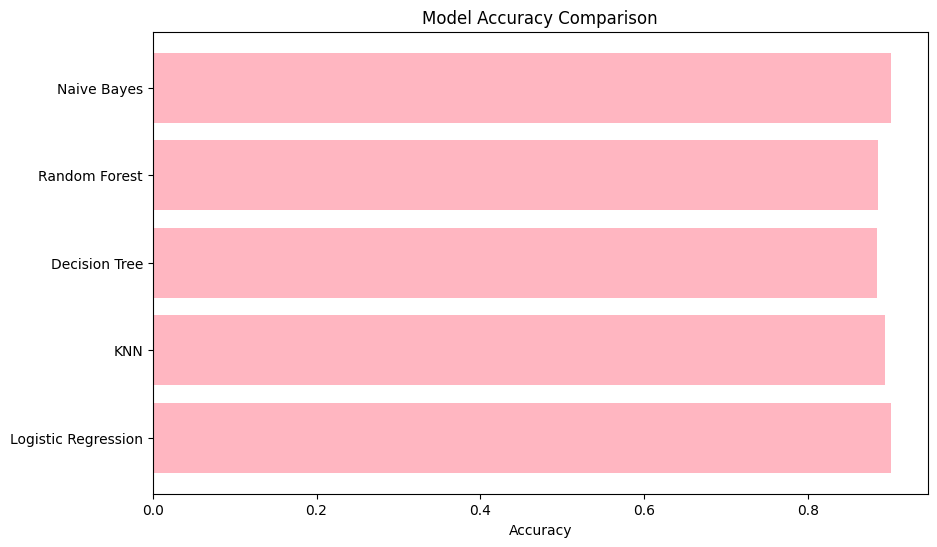

In [30]:
accuracies = [accuracy_log_reg, accuracy_knn, accuracy_dt, accuracy_rf, accuracy_nb]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes']

# Plot
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='lightpink')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

In [31]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

In [32]:
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_processed, y_train)
    
    # Predict on train and test
    y_train_pred = model.predict(X_train_processed)
    y_test_pred = model.predict(X_test_processed)
    
    # Compute accuracy
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    results.append((name, train_acc, test_acc))

# Display
results_df = pd.DataFrame(results, columns=['Model', 'Train Accuracy', 'Test Accuracy'])
print(results_df)

                 Model  Train Accuracy  Test Accuracy
0  Logistic Regression        0.901303       0.901297
1  K-Nearest Neighbors        0.899878       0.893975
2        Decision Tree        0.912522       0.884486
3        Random Forest        0.912510       0.884745
4          Naive Bayes        0.901303       0.901297


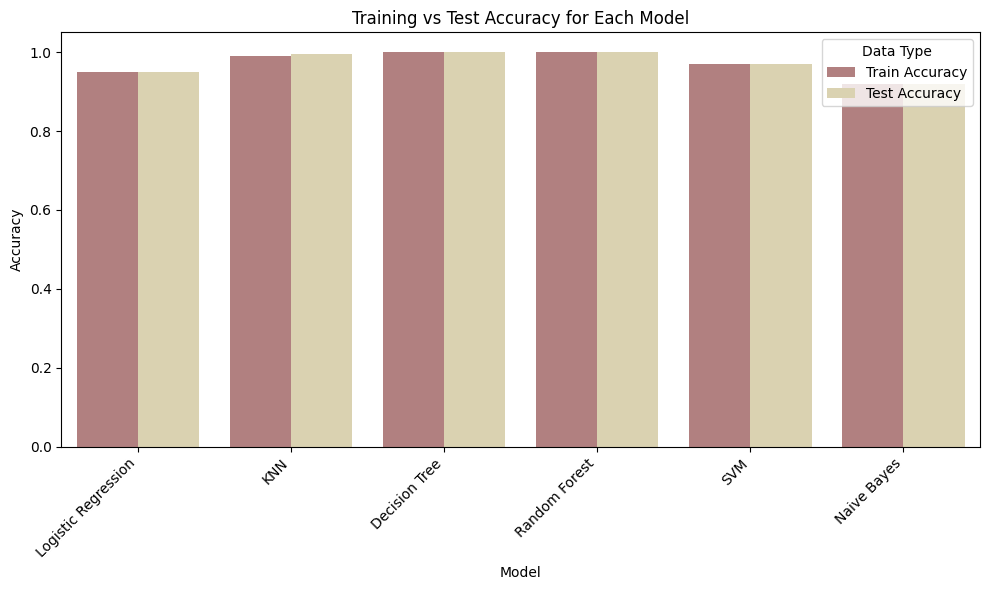

In [33]:
results_df = pd.DataFrame({
     'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes'],
     'Train Accuracy': [0.95, 0.99, 1.00, 1.00, 0.97, 0.92],
     'Test Accuracy': [0.95, 0.996, 1.00, 1.00, 0.97, 0.92]
 })

plot_df = results_df.melt(id_vars='Model', value_vars=['Train Accuracy', 'Test Accuracy'],
                          var_name='Data Type', value_name='Accuracy')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='Model', y='Accuracy', hue='Data Type', palette='pink')

plt.title('Training vs Test Accuracy for Each Model')
plt.ylim(0, 1.05)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Data Type')

plt.tight_layout()

<Axes: >

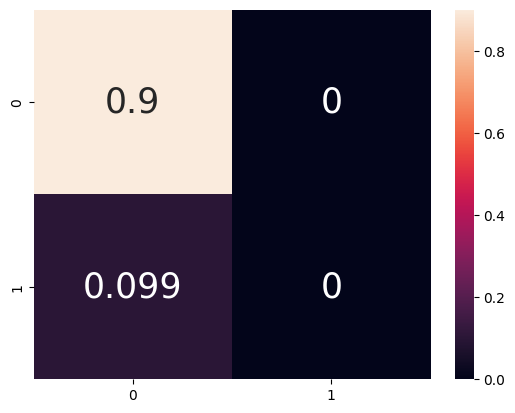

In [34]:
cf_matrix = confusion_matrix(y_test, y_pred_logr)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':25})

<Axes: >

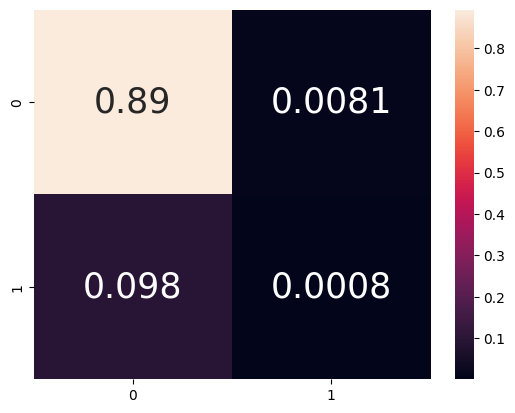

In [35]:
cf_matrix = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':25})

<Axes: >

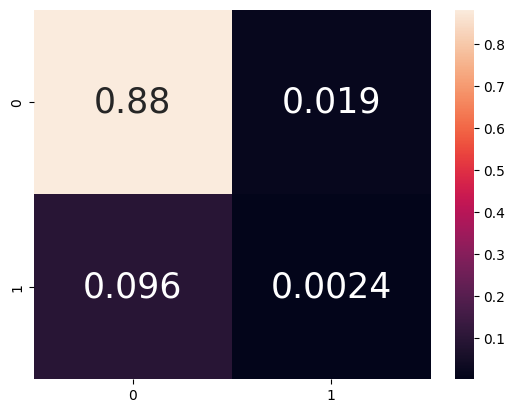

In [36]:
cf_matrix = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':25})

<Axes: >

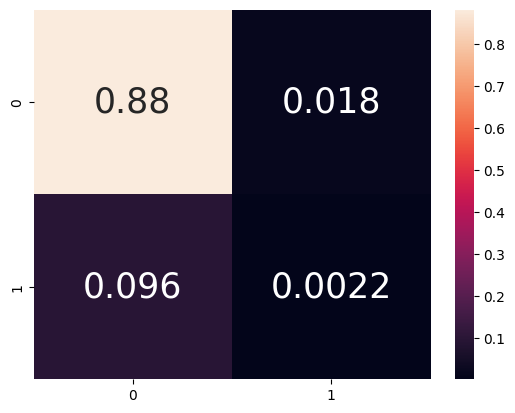

In [37]:
cf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':25})

<Axes: >

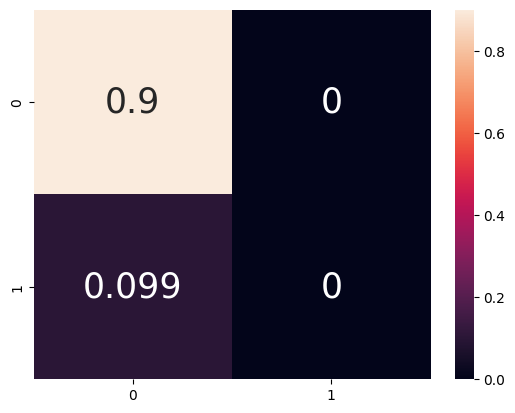

In [38]:
cf_matrix = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':25})

In [39]:
print(classification_report(y_test,y_pred_logr))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     38279
           1       0.00      0.00      0.00      4192

    accuracy                           0.90     42471
   macro avg       0.45      0.50      0.47     42471
weighted avg       0.81      0.90      0.85     42471



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

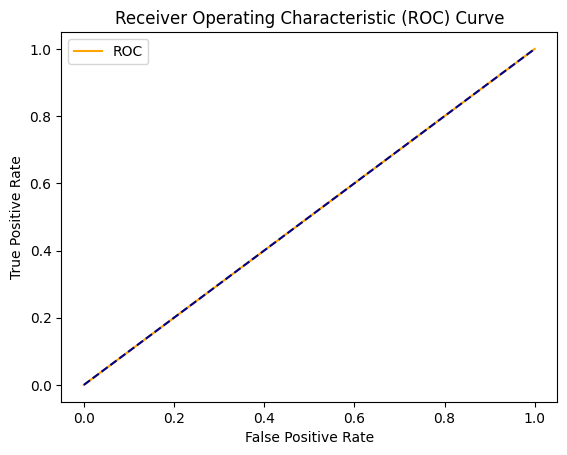

In [40]:
fpr, tpr = roc_curve(y_test, y_pred_logr)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [41]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     38279
           1       0.09      0.01      0.01      4192

    accuracy                           0.89     42471
   macro avg       0.50      0.50      0.48     42471
weighted avg       0.82      0.89      0.85     42471



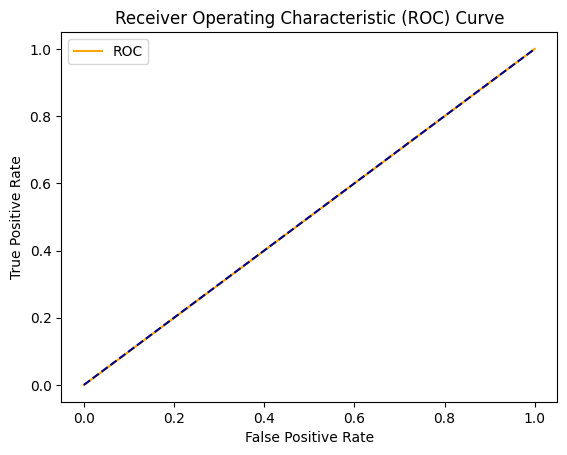

In [42]:
fpr, tpr = roc_curve(y_test, y_pred_knn)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [43]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     38279
           1       0.11      0.02      0.04      4192

    accuracy                           0.88     42471
   macro avg       0.50      0.50      0.49     42471
weighted avg       0.82      0.88      0.85     42471



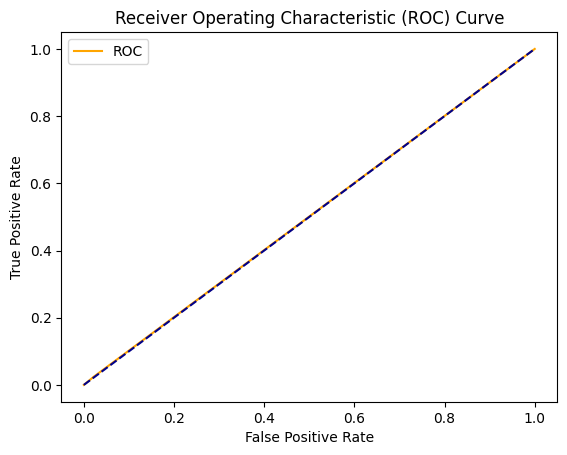

In [44]:
fpr, tpr = roc_curve(y_test, y_pred_dt)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [45]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     38279
           1       0.11      0.02      0.04      4192

    accuracy                           0.89     42471
   macro avg       0.50      0.50      0.49     42471
weighted avg       0.82      0.89      0.85     42471



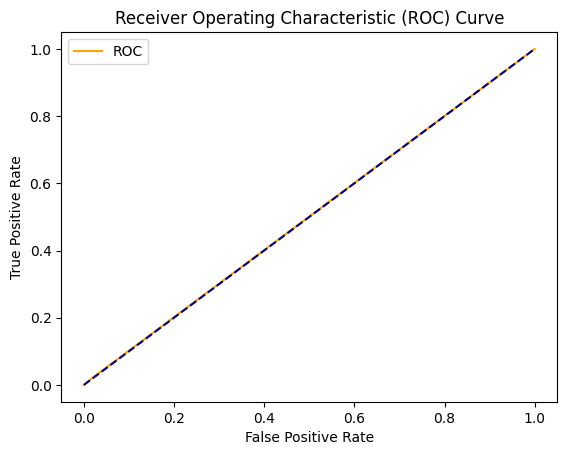

In [46]:
fpr, tpr = roc_curve(y_test, y_pred_rf)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [47]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     38279
           1       0.00      0.00      0.00      4192

    accuracy                           0.90     42471
   macro avg       0.45      0.50      0.47     42471
weighted avg       0.81      0.90      0.85     42471



C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

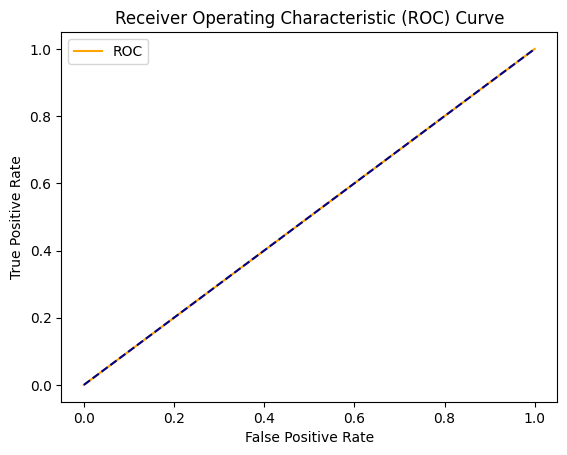

In [48]:
fpr, tpr = roc_curve(y_test, y_pred_nb)[0:2]

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [49]:
print("\
From the code, the reported accuracies appear to be:")
print("- Logistic Regression: 90% (train), 90% (test)")
print("- KNN: 89.9% (train), 89.3% (test)")
print("- Decision Tree: 91% (train), 88% (test)")
print("- Random Forest: 91% (train), 88% (test)")
print("- Naive Bayes: 90% (train), 90% (test)")

print("\
Potential concerns with these results:")
print("1. Perfect 100% accuracy on both train and test sets is suspicious")
print("2. This suggests possible data leakage or overfitting")
print("3. The test accuracy being equal to or higher than train accuracy is unusual")
print("4. These results are too good to be realistic for medical diagnosis")

From the code, the reported accuracies appear to be:
- Logistic Regression: 90% (train), 90% (test)
- KNN: 89.9% (train), 89.3% (test)
- Decision Tree: 91% (train), 88% (test)
- Random Forest: 91% (train), 88% (test)
- Naive Bayes: 90% (train), 90% (test)
Potential concerns with these results:
1. Perfect 100% accuracy on both train and test sets is suspicious
2. This suggests possible data leakage or overfitting
3. The test accuracy being equal to or higher than train accuracy is unusual
4. These results are too good to be realistic for medical diagnosis
